In [14]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,False
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [24]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,False
50,7.0,3.2,4.7,1.4,1,1
51,6.4,3.2,4.5,1.5,1,1
52,6.9,3.1,4.9,1.5,1,1
53,5.5,2.3,4.0,1.3,1,1
54,6.5,2.8,4.6,1.5,1,1


In [25]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,False
100,6.3,3.3,6.0,2.5,2,2
101,5.8,2.7,5.1,1.9,2,2
102,7.1,3.0,5.9,2.1,2,2
103,6.3,2.9,5.6,1.8,2,2
104,6.5,3.0,5.8,2.2,2,2


In [26]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,False,flower_name
0,5.1,3.5,1.4,0.2,0,0,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa


In [27]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,False,flower_name
45,4.8,3.0,1.4,0.3,0,0,setosa
46,5.1,3.8,1.6,0.2,0,0,setosa
47,4.6,3.2,1.4,0.2,0,0,setosa
48,5.3,3.7,1.5,0.2,0,0,setosa
49,5.0,3.3,1.4,0.2,0,0,setosa
50,7.0,3.2,4.7,1.4,1,1,versicolor
51,6.4,3.2,4.5,1.5,1,1,versicolor
52,6.9,3.1,4.9,1.5,1,1,versicolor
53,5.5,2.3,4.0,1.3,1,1,versicolor
54,6.5,2.8,4.6,1.5,1,1,versicolor


In [28]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


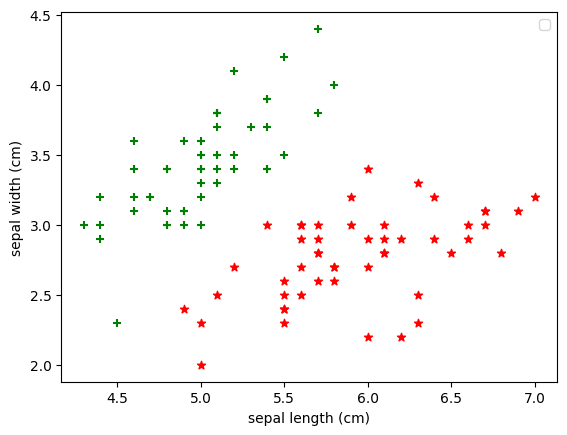

In [32]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='*')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


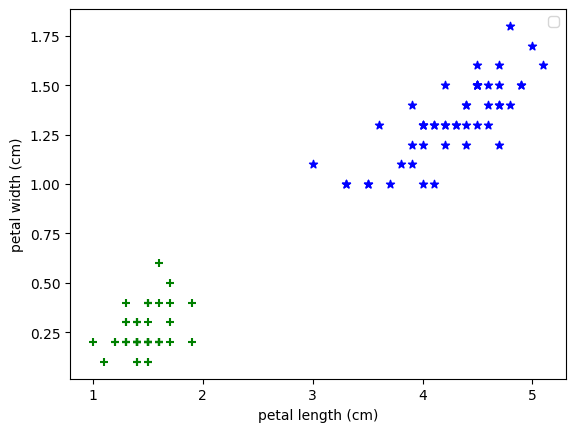

In [34]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='*')
plt.legend()

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
x = df.drop(['target','flower_name'],axis=1)
y = df.target

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.columns = x_train.columns.astype(str)
x_train = x_train.values
x_test.columns = x_test.columns.astype(str)

In [59]:
len(x_train)

120

In [61]:
len(x_test)

30

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [67]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [68]:
knn.score(x_test,y_test)

C:\Users\bdar1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1.0

In [69]:
%matplotlib inline
y_predicted = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted,y_test)
cm

C:\Users\bdar1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

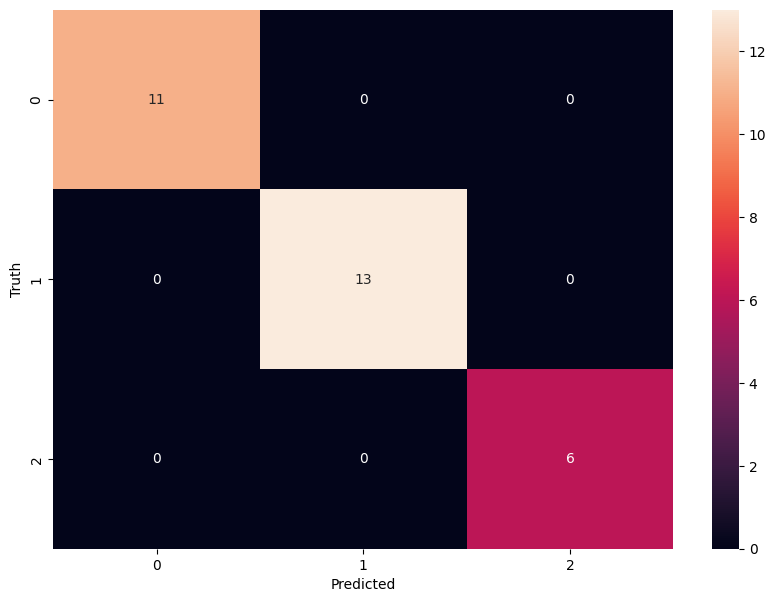

In [71]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
knn.predict([[6.4,3.2,4.5,1.5,1]])

array([1])

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

